# Some basic RMSD analysis

In this example, RMSD (Root-Mean-Square Deviation) is computed for the ligand atoms over the trajectory. The RMSD is a measure of the structural distance between atomic coordinates, and can be used to see how much a structure changes over time relative to a reference structure.

/opt/conda/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:290: UserWarning: PDB file is missing resid information.  Defaulted to '1'
  warnings.warn("PDB file is missing resid information.  "


['MET' 'LEU' 'ALA' ... 'NA' 'NA' 'NA']
Residue UNK-1 is present in the system.


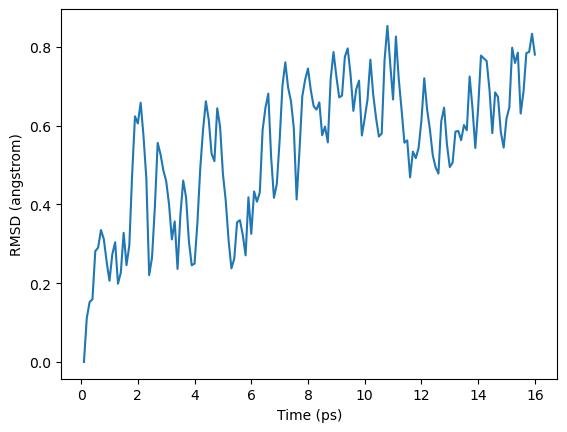

In [14]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms

u = mda.Universe("assets/cookbook/hydrated_topolgy.pdb", "assets/cookbook/first_output.xtc")

print(u.residues.resnames)

residue_names = [residue.resname for residue in u.residues]

if 'UNK' in residue_names:
    print("Residue UNK-1 is present in the system.")
else:
    print("Residue UNK-1 is not found in the system.")

# Select the ligand atoms
ligand = u.select_atoms("resname UNK")

# Check if the selection is empty
if len(ligand) == 0:
    raise ValueError("Ligand selection is empty.")

# Calculate the RMSD of the ligand atoms
R = rms.RMSD(ligand, reference=ligand, select="resname UNK")
R.run()

# Access the RMSD results
rmsd = R.results.rmsd.T

time = rmsd[1]
rmsd = rmsd[2]

# Plot the RMSD over time
import matplotlib.pyplot as plt

plt.plot(time, rmsd)
plt.xlabel("Time (ps)")
plt.ylabel("RMSD (angstrom)")
plt.show()

## Radius of Gyration: 
The radius of gyration is a measure of the size of a molecule. It is calculated as the root-mean-square distance of the atoms from their common center of mass. Changes in the radius of gyration over time can indicate conformational changes in the molecule.

The radius of gyration is a measure to describe the size or the extent of an object in space. In the context of molecular dynamics, it is a measure of the spread of atoms around the center of mass of a molecule or a group of atoms. It helps us understand how far, on average, the atoms in the molecule are spread out from the center of mass.
Mathematically, it is defined as the root mean square distance of the atoms from the center of mass.

 The formula is as follows:
Rg = sqrt( Σ (m_i * r_i^2) / Σ m_i)
where:
m_i is the mass of atom i
r_i is the distance of atom i from the center of mass of the molecule
In simpler terms, for each atom, you find the distance to the center of mass, square it, multiply it by the mass of the atom, sum all these values for all atoms, divide it by the total mass, and then take the square root of the result.

For a ligand molecule, the radius of gyration can give us an idea of the compactness of the ligand's structure. A larger radius of gyration typically indicates a more extended or unfolded structure, while a smaller radius of gyration indicates a more compact or folded structure.
Over the course of a molecular dynamics simulation, we might be interested in the changes in the radius of gyration. These changes can give us insights into conformational changes in the molecule, such as folding, unfolding, or structural rearrangements.

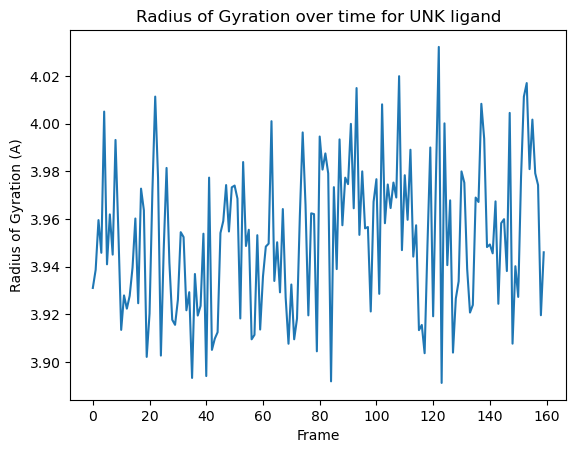

In [16]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt
import numpy as np

u = mda.Universe("assets/cookbook/hydrated_topolgy.pdb", "assets/cookbook/first_output.xtc")

# Select the ligand atoms
ligand = u.select_atoms("resname UNK")

# Initialize an empty list to store the Radius of Gyration
Rg = []

# Calculate the Radius of Gyration for each frame
for ts in u.trajectory:
    Rg.append(ligand.radius_of_gyration())

# Plot the Radius of Gyration over time
time = np.arange(u.trajectory.n_frames)
plt.plot(time, Rg)
plt.xlabel('Frame')
plt.ylabel('Radius of Gyration (A)')
plt.title('Radius of Gyration over time for UNK ligand')
plt.show()

## Distance analysis

In this script, protein.center_of_mass() and ligand.center_of_mass() calculate the center of mass of the protein and the ligand, respectively. The difference between these two positions gives a vector, and np.linalg.norm(distance) calculates the length of this vector (i.e., the distance between the two centers of mass). The distances are then plotted as a function of time.

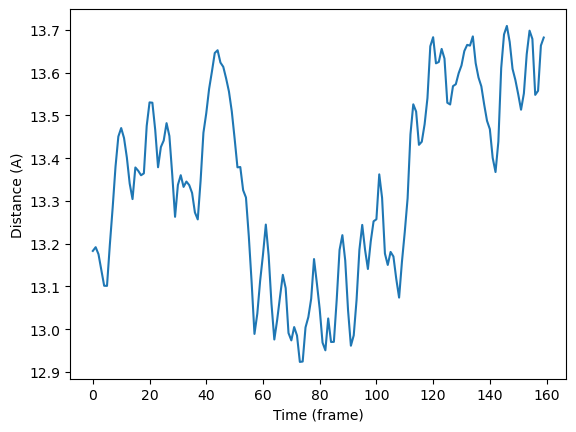

In [19]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np

# Load the Universe from files
u = mda.Universe('assets/cookbook/hydrated_topolgy.pdb', 'assets/cookbook/first_output.xtc')

# Select the protein and the ligand
protein = u.select_atoms('protein')
ligand = u.select_atoms('resname UNK')

# Initialize an empty list to store the distances
distances = []

# Iterate over the trajectory
for ts in u.trajectory:
    # Calculate the distance between the center of mass of the protein and the ligand
    distance = protein.center_of_mass() - ligand.center_of_mass()
    # The distance calculated above is a vector, so we calculate its magnitude (i.e., its length)
    distance = np.linalg.norm(distance)
    # Append the distance to the list
    distances.append(distance)

# Create a time array
time = np.arange(len(distances))

# Plot the distances
plt.plot(time, distances)
plt.xlabel('Time (frame)')
plt.ylabel('Distance (A)')
plt.show()

## Distance to nearest residue

Tracking the distance between the ligand and the protein's closest residue throughout the simulation allows us to understand how thermalising the system affects the ligand's binding. This gives a sense of how tightly the ligand binds to the protein and how this interaction evolves. 

It is possible to perform this analysis with the following operations:
Selecting Protein and Ligand: The protein and the ligand (named 'UNK') are selected from the loaded MD simulation data using MDAnalysis atom selections.
Choosing a Frame: A frame of interest is identified from the simulation trajectory. Here, the first frame is chosen. (u.trajectory[0] for first frame)
Calculating Distances: In this chosen frame, distances between the center of mass of the ligand and the center of mass of each protein residue are determined.
Identifying the Closest Residue: The residue that is closest to the ligand is identified and its name and index are output.
Tracking Distance Over Time: The code then steps through each frame in the trajectory and calculates the distance between the center of mass of the ligand and the center of mass of the closest residue identified earlier. These distances are collected in a list.

The closest residue to the ligand in the chosen frame is GLU 60.


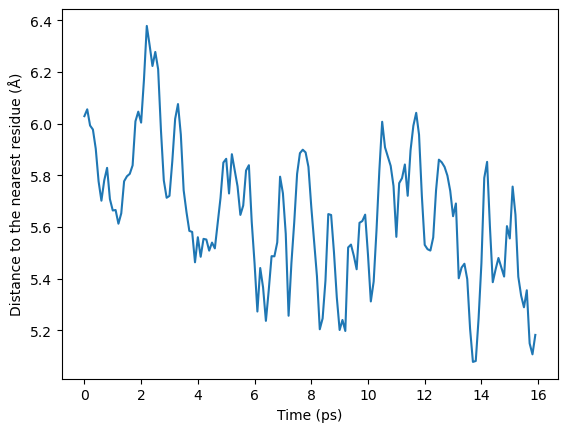

In [36]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the Universe from files
u = mda.Universe('assets/cookbook/hydrated_topolgy.pdb', 'assets/cookbook/first_output.xtc')

# Select the protein and the ligand
protein = u.select_atoms('protein')
ligand = u.select_atoms('resname UNK')

# Set the desired frame
u.trajectory[0]  # substitute 0 with the index of your desired frame

# Find the distances between the center of mass of the ligand and each protein residue in the chosen frame
residue_distances = [np.linalg.norm(residue.atoms.center_of_mass() - ligand.center_of_mass()) for residue in protein.residues]

# Find the index of the residue with the smallest distance to the ligand
closest_residue_idx = np.argmin(residue_distances)

# Get the closest residue
closest_residue = protein.residues[closest_residue_idx]

# Print the index and the name of the closest residue
print(f"The closest residue to the ligand in the chosen frame is {closest_residue.resname} {closest_residue.resid}.")

# Prepare a list to store the distances
distances = []

# Iterate over the trajectory
for ts in u.trajectory:
    # Calculate the distance between the center of mass of the ligand and the center of mass of the closest residue
    distance = np.linalg.norm(ligand.center_of_mass() - closest_residue.atoms.center_of_mass())
    # Store the distance
    distances.append(distance)

# Convert the list of distances to a numpy array
distances = np.array(distances)

# Generate the time array
time = np.arange(len(u.trajectory)) * u.trajectory.dt

# Plot the distance over time
plt.plot(time, distances)
plt.xlabel('Time (ps)')
plt.ylabel('Distance to the nearest residue (Å)')
plt.show()

## Cheap and reduced accuracy Hydrogen bonding analsyis 

A detailed analysis of hydrogen bonds would take into consideration the partial charges of the atoms involved to more accurately determine the potential for hydrogen bonding. However, in this script, we are performing a more simplified analysis that only considers the geometric criteria of hydrogen bonds - the donor-acceptor distance and the donor-hydrogen-acceptor angle. While this approach is less accurate than a full electrostatics-based calculation, it provides a useful first approximation and can be done without knowledge of the partial charges in the system.

Hydrogen bonds are complex electrostatic interactions, but for simplicity, we are going to use a straightforward geometric approach. We define a hydrogen bond as any donor-hydrogen-acceptor set where the donor-acceptor distance is less than 3.0 Å.

To define donors, hydrogens, and acceptors, we need to specify atom selections. For our protein, any atom named 'O' or 'N' is considered a donor, and any atom named 'O' is considered an acceptor. For our ligand, any atom named 'O' or 'N' is considered a donor, any atom named 'H' is considered a hydrogen, and any atom named 'O' is considered an acceptor.

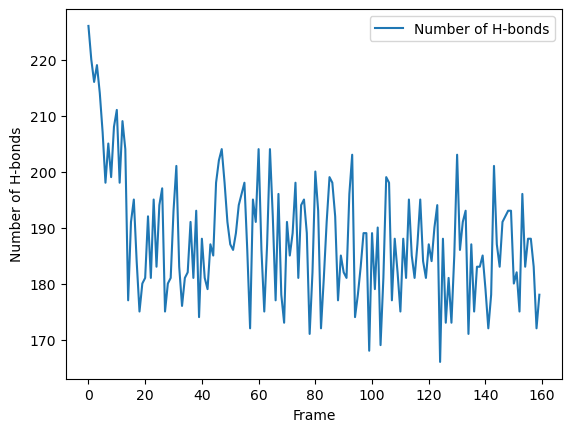

In [35]:
import MDAnalysis as mda
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis

# Load the universe
u = mda.Universe("assets/cookbook/hydrated_topolgy.pdb", "assets/cookbook/first_output.xtc")

# Define the selection strings for the protein and the ligand
protein_donors = "protein and (name N H H1 H2 H3)"
protein_acceptors = "protein and (name O)"
ligand_donors = "resname LIG and (name N H)"
ligand_acceptors = "resname LIG and (name O)"

# Initialize the hydrogen bond analysis
hbonds = HBA(
  universe=u,
  donors_sel=protein_donors + " or " + ligand_donors,
  hydrogens_sel=protein_donors + " or " + ligand_donors,  # Hydrogens are typically co-located with the donors
  acceptors_sel=protein_acceptors + " or " + ligand_acceptors,
  d_h_cutoff=1.2  # You can adjust the distance cutoff as needed
)

# Run the analysis
hbonds.run()

# Get the number of hydrogen bonds over time
num_hbonds = hbonds.count_by_time()

# Create a new figure
plt.figure()

# Plot the number of hydrogen bonds
plt.plot(num_hbonds, label='Number of H-bonds')

# Add labels to the axes
plt.xlabel('Frame')
plt.ylabel('Number of H-bonds')

# Add a legend
plt.legend()

# Show the plot
plt.show()